In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from scipy import stats

import warnings
warnings.filterwarnings('ignore')


In [2]:
# 보스톤 주택 가격(연속값) 예측(회귀모델)
# 데이터 로딩
boston_df=pd.read_csv(
    './boston_house_prices.csv'
    ,encoding='utf-8'
    ,header=1
)

boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [4]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [5]:
boston_df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

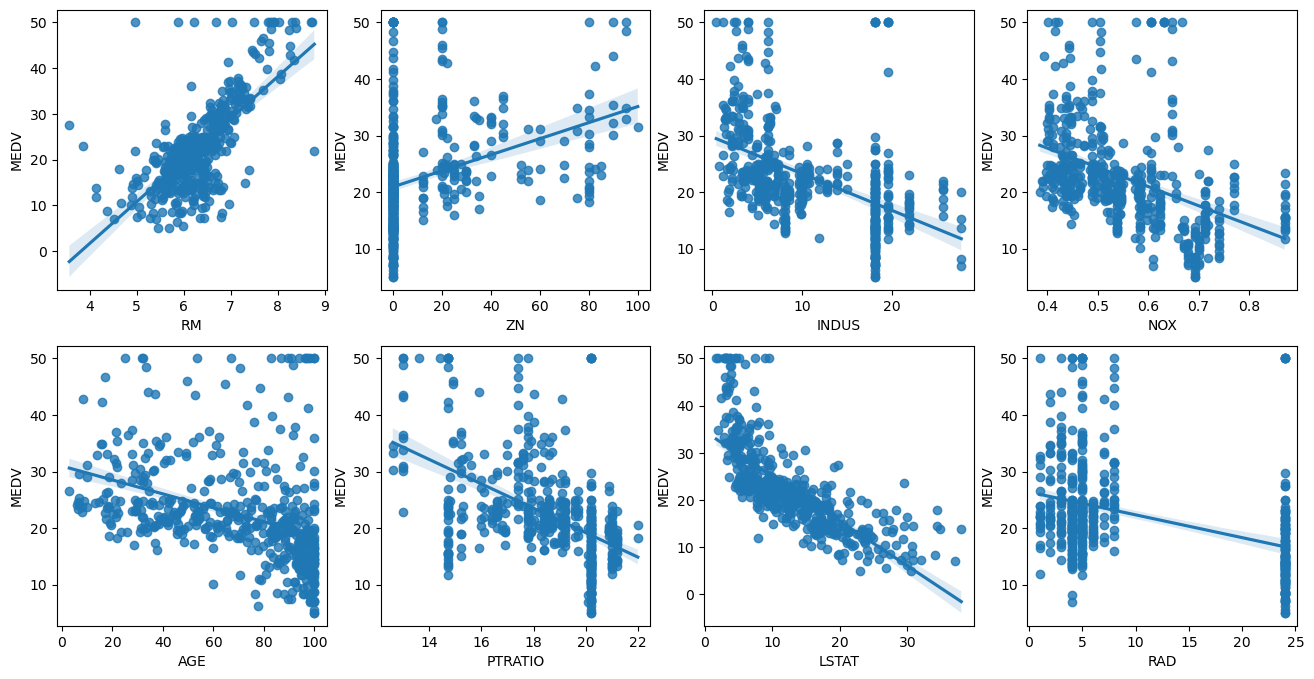

In [6]:
fig,axs=plt.subplots(
    figsize=(16,8)
    ,ncols=4
    ,nrows=2
)
lm_feautres=['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']

for i, feature in enumerate(lm_feautres):
    row =int(i/4)
    col = i%4
    # 사본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
    sns.regplot(
        x=feature
        ,y='MEDV'
        ,data=boston_df
        ,ax=axs[row][col]
    )
plt.show()

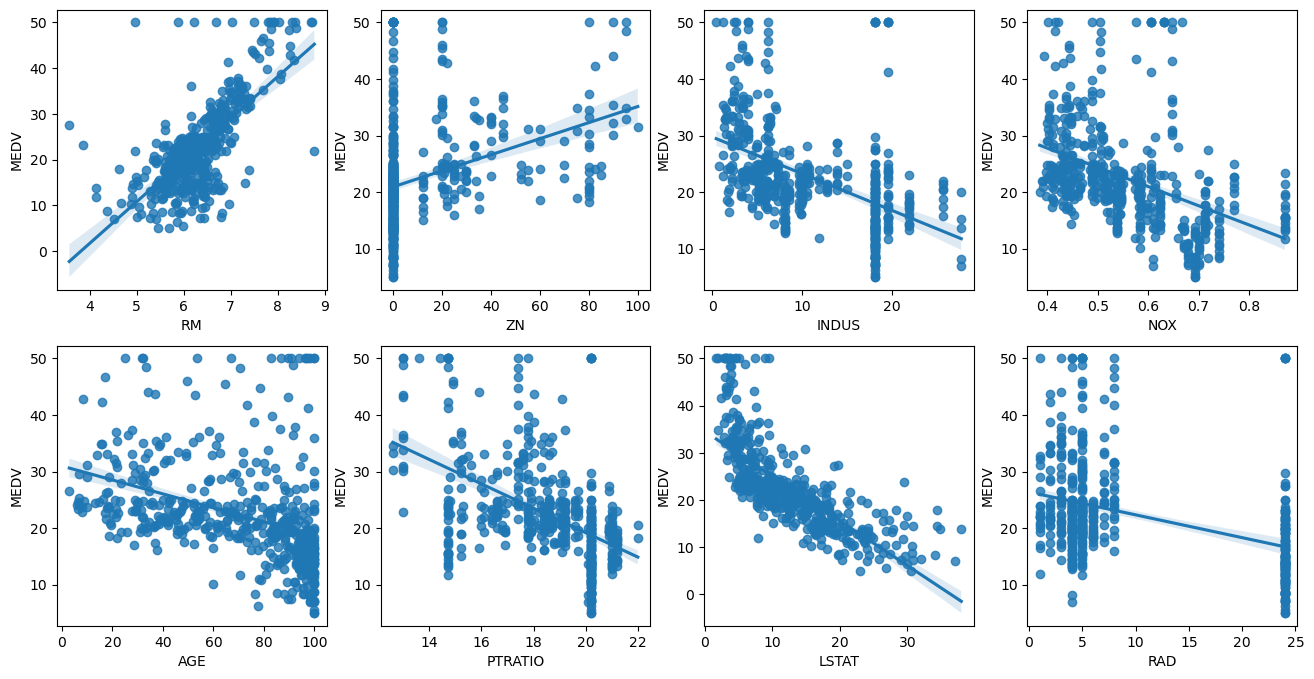

In [7]:
fig,axs=plt.subplots(
    figsize=(16,8)
    ,ncols=4
    ,nrows=2
)
lm_feautres=['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']


for i, feature in enumerate(lm_feautres):
    row =int(i/4)
    col = i%4
    # 사본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
    sns.regplot(
        x=feature
        ,y='MEDV'
        ,data=boston_df
        ,ax=axs[row][col]
    )
plt.show()

In [8]:
# 2개의 행과 4개의 열을 가진 subplots를 이용. axs는 4x2개의 ax를 가짐.
fig, axs = plt.subplots(figsize=(16,8) , ncols=4 , nrows=2)
lm_features = ['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']
for i , feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    # 시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
    sns.regplot(x=feature , y='MEDV',data=boston_df , ax=axs[row][col])


# 이미지 파일 저장
fig1 = plt.gcf()
fig1.savefig('p322_boston.tif', format='tif', dpi=300, bbox_inches='tight')

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 데이터 레이블 분리
y_target=boston_df['MEDV']
X_data=boston_df.drop(['MEDV'],axis=1,inplace=False)# False : 삭제한 DF를 반환


In [10]:
# 학습/테스트 데이터 분리
X_train,X_test,y_train,y_test=train_test_split(
    X_data
    ,y_target
    ,test_size=0.3
    ,random_state=0
)

In [11]:
# LinearRegression object create
lr =LinearRegression()
lr.fit(X_train,y_train) # 학습
y_pred=lr.predict(X_test) # 테스트 데이터로 예측값 출력

# 오차(원래답-예측값) : MSE
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse) # 제곱근
print(f'MSE : {mse}, RMSE : {rmse}')
print(f'Variance score : {r2_score(y_test,y_pred)}')

MSE : 27.19596576688331, RMSE : 5.214975145375413
Variance score : 0.6733825506400183


In [12]:
# 피쳐의 영향력 : 개수 값을 출력
print(f'회귀 계수 값 " {lr.coef_}')

회귀 계수 값 " [-1.21310401e-01  4.44664254e-02  1.13416945e-02  2.51124642e+00
 -1.62312529e+01  3.85906801e+00 -9.98516565e-03 -1.50026956e+00
  2.42143466e-01 -1.10716124e-02 -1.01775264e+00  6.81446545e-03
 -4.86738066e-01]


In [13]:
coeff=pd.Series(
    data=np.round(lr.coef_,1)
    ,index=X_data.columns
)
coeff

CRIM       -0.1
ZN          0.0
INDUS       0.0
CHAS        2.5
NOX       -16.2
RM          3.9
AGE        -0.0
DIS        -1.5
RAD         0.2
TAX        -0.0
PTRATIO    -1.0
B           0.0
LSTAT      -0.5
dtype: float64

In [14]:
coeff=pd.Series(
    data=np.round(lr.coef_,1)
    ,index=X_data.columns
)
coeff.sort_values(ascending=False)

RM          3.9
CHAS        2.5
RAD         0.2
ZN          0.0
INDUS       0.0
AGE        -0.0
TAX        -0.0
B           0.0
CRIM       -0.1
LSTAT      -0.5
PTRATIO    -1.0
DIS        -1.5
NOX       -16.2
dtype: float64

In [15]:
X_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


In [16]:
y_target.info()

<class 'pandas.core.series.Series'>
RangeIndex: 506 entries, 0 to 505
Series name: MEDV
Non-Null Count  Dtype  
--------------  -----  
506 non-null    float64
dtypes: float64(1)
memory usage: 4.1 KB


In [22]:
# 상수항 추가
import statsmodels.api as sm

X=sm.add_constant(X_data)

# OLS(회구 모델)
model=sm.OLS(y_target,X)

# 학습
result=model.fit()

# 결과 출력
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Thu, 10 Apr 2025   Prob (F-statistic):          6.72e-135
Time:                        12:32:24   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.0

In [24]:
# 다중 공산성 : 피쳐 간 상관계수가 너무 클 때 발생, 계수의 불안정과 해석의 어려움 발생
# 결론적으로 모델 성능 저하
from statsmodels.stats.outliers_influence import  variance_inflation_factor

vif=pd.DataFrame() # 빈 데이터프레임 생성
vif['feature']=X.columns
vif['VIF']=[
    variance_inflation_factor(X.values, idx) for idx in range(X.shape[1])
]
vif


,feature,VIF
0,const,585.265238
1,CRIM,1.792192
2,ZN,2.298758
3,INDUS,3.991596
4,CHAS,1.073995
5,NOX,4.393720
6,RM,1.933744
7,AGE,3.100826
8,DIS,3.955945
9,RAD,7.484496


In [27]:
# 다항식
from sklearn.preprocessing import PolynomialFeatures

# 예제 데이터 생성 [2x2]
X=np.arange(4).reshape(2,2)
print(f'일차 단항식 계수 피쳐\n{X}')

# degree = 2인 2차 다항식으로 변환하기 위해 PolynomialFeatures를 이용해 변환
poly=PolynomialFeatures(degree=2)
poly.fit(X)
poly_ftr=poly.transform(X)
print(f'변환된 2차 다항식 계수 피쳐:\n{poly_ftr}')

일차 단항식 계수 피쳐
[[0 1]
 [2 3]]
변환된 2차 다항식 계수 피쳐:
[[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

boston_df=pd.read_csv(
    './boston_house_prices.csv'
    ,encoding='utf-8'
    ,header=1
)


y_target=boston_df['MEDV']
X_data=boston_df.drop(['MEDV'],axis=1,inplace=False)

X_train,X_test,y_train,y_test=train_test_split(
    X_data
    ,y_target
    ,test_size=0.3
    ,random_state=0
)

lr =LinearRegression()
lr.fit(X_train,y_train) 
y_pred=lr.predict(X_test) 

mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse) 


# 보스톤 주택 데이터 -> 다항식으로 변환 후 처리
# X_data : 전체 데이터
# X_data.info() : 13개의 features
from sklearn.preprocessing import PolynomialFeatures

print(f'X_data의 shape : {X_data.shape}')
poly=PolynomialFeatures(degree=2)
poly.fit(X_data)
poly_ftr=poly.transform(X_data)
print(f'X_data를 다항식 적용한 shape : {poly_ftr.shape}')


X_data의 shape : (506, 13)
X_data를 다항식 적용한 shape : (506, 105)


In [38]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

boston_df=pd.read_csv(
    './boston_house_prices.csv'
    ,encoding='utf-8'
    ,header=1
)


y_target=boston_df['MEDV']
X_data=boston_df.drop(['MEDV'],axis=1,inplace=False)

X_train,X_test,y_train,y_test=train_test_split(
    X_data
    ,y_target
    ,test_size=0.3
    ,random_state=0
)

# LinearRegression object create
lr =LinearRegression()
lr.fit(X_train,y_train) # 학습
y_pred=lr.predict(X_test) # 테스트 데이터로 예측값 출력

# 오차(원래답-예측값) : MSE
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse) # 제곱근
print('다항식 변경 전')
print(f'피처의 개수 : {poly_ftr.shape[1]}')
print(f'MSE : {mse}, RMSE : {rmse}')
print(f'Variance score : {r2_score(y_test,y_pred)}')
# 보스톤 주택 데이터 -> 다항식으로 변환 후 처리
# X_data : 전체 데이터
# X_data.info() : 13개의 features
from sklearn.preprocessing import PolynomialFeatures
# print(f'X_data의 shape : {X_data.shape}')

print('다항식 변경 후')
poly=PolynomialFeatures(degree=2)
poly.fit(X_data)
poly_ftr=poly.transform(X_data)
# print(f'X_data를 다항식 적용한 shape : {poly_ftr.shape}')

print(f'피처의 개수 : {poly_ftr.shape[1]}')
# 학습/테스트 데이터 분리
X_train_poly,X_test_poly,y_train_poly,y_test_poly=train_test_split(
    poly_ftr # 다항식으로 변환한 전체 데이터
    ,y_target # 전체 레이블
    ,test_size=0.3 
    ,random_state=156
)

lr =LinearRegression()
lr.fit(X_train_poly,y_train_poly) 
y_pred=lr.predict(X_test_poly) 

mse=mean_squared_error(y_test_poly,y_pred)
rmse=np.sqrt(mse) 
print(f'MSE : {mse}, RMSE : {rmse}')
print(f'Variance score : {r2_score(y_test_poly,y_pred)}')

print('다항식 degree 5로 설정할때')
degree=5

poly=PolynomialFeatures(degree=degree)
poly.fit(X_data)
poly_ftr=poly.transform(X_data)
# print(f'X_data를 다항식 적용한 shape : {poly_ftr.shape}')

# 학습/테스트 데이터 분리
print(f'피처의 개수 : {poly_ftr.shape[1]}')
X_train_poly,X_test_poly,y_train_poly,y_test_poly=train_test_split(
    poly_ftr # 다항식으로 변환한 전체 데이터
    ,y_target # 전체 레이블
    ,test_size=0.3 
    ,random_state=156
)

lr =LinearRegression()
lr.fit(X_train_poly,y_train_poly) 
y_pred=lr.predict(X_test_poly) 

mse=mean_squared_error(y_test_poly,y_pred)
rmse=np.sqrt(mse) 
print(f'MSE : {mse}, RMSE : {rmse}')
print(f'Variance score : {r2_score(y_test_poly,y_pred)}')

print('다항식 degree 3로 설정할때')
degree=3

poly=PolynomialFeatures(degree=degree)
poly.fit(X_data)
poly_ftr=poly.transform(X_data)
# print(f'X_data를 다항식 적용한 shape : {poly_ftr.shape}')

# 학습/테스트 데이터 분리
print(f'피처의 개수 : {poly_ftr.shape[1]}')
X_train_poly,X_test_poly,y_train_poly,y_test_poly=train_test_split(
    poly_ftr # 다항식으로 변환한 전체 데이터
    ,y_target # 전체 레이블
    ,test_size=0.3 
    ,random_state=156
)

lr =LinearRegression()
lr.fit(X_train_poly,y_train_poly) 
y_pred=lr.predict(X_test_poly) 

mse=mean_squared_error(y_test_poly,y_pred)
rmse=np.sqrt(mse) 
print(f'MSE : {mse}, RMSE : {rmse}')
print(f'Variance score : {r2_score(y_test_poly,y_pred)}')


다항식 변경 전
피처의 개수 : 560
MSE : 27.19596576688331, RMSE : 5.214975145375413
Variance score : 0.6733825506400183
다항식 변경 후
피처의 개수 : 105
MSE : 15.555752317135491, RMSE : 3.9440781327371663
Variance score : 0.7816647161982018
다항식 degree 5로 설정할때
피처의 개수 : 8568
MSE : 17772.651605086106, RMSE : 133.31410879980447
Variance score : -248.45093319803598
다항식 degree 3로 설정할때
피처의 개수 : 560
MSE : 79625.59306218041, RMSE : 282.180072050066
Variance score : -1116.5979216361695


In [44]:
import numpy as np
import pandas as pd
from sklearn.model_selection import  cross_val_score
from sklearn.linear_model import Ridge

import warnings
warnings.filterwarnings('ignore')

# 데이터 로딩
boston_df = pd.read_csv('./boston_house_prices.csv', encoding='utf-8', header=1)

# 타깃과 피처 분리
y_target = boston_df['MEDV']
X_data = boston_df.drop(['MEDV'], axis=1, inplace=False)

# 릿지 회귀 모델 및 교차 검증 MSE 평가
ridge = Ridge(alpha=10)
mse_scores = cross_val_score(
    ridge, X_data, y_target, scoring='neg_mean_squared_error', cv=5
)

# 5개의 평가 점수 나온다
print(f'mse_scores : {mse_scores}')
rsme_scores=np.sqrt(-1*mse_scores)
print(f'rsme_scores : {rsme_scores}')
avg_rsme=np.mean(rsme_scores)
print(f'rsme 평균 : {avg_rsme}')

mse_scores : [-11.4217962  -24.29446706 -28.14355069 -74.59916618 -28.51714218]
rsme_scores : [3.3796148  4.92894178 5.30504955 8.63708088 5.3401444 ]
rsme 평균 : 5.518166280868973


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import  cross_val_score
from sklearn.linear_model import Ridge

import warnings
warnings.filterwarnings('ignore')

# 데이터 로딩
boston_df = pd.read_csv('./boston_house_prices.csv', encoding='utf-8', header=1)

# 타깃과 피처 분리
y_target = boston_df['MEDV']
X_data = boston_df.drop(['MEDV'], axis=1, inplace=False)

# 릿지 회귀 모델 및 교차 검증 MSE 평가
# aplphas=[0,0.1,1,10,100,1000,10000]
aplphas=range(1,1000)
for aplpha in aplphas:
    print('='*100)
    print(f'alpha가 {aplpha}인 경우')
    ridge = Ridge(alpha=aplpha)
    mse_scores = cross_val_score(
        ridge, X_data, y_target, scoring='neg_mean_squared_error', cv=5
    )
    # 5개의 평가 점수 나온다
    print(f'mse_scores : {mse_scores}')
    rsme_scores=np.sqrt(-1*mse_scores)
    print(f'rsme_scores : {rsme_scores}')
    avg_rsme=np.mean(rsme_scores)
    print(f'rsme 평균 : {avg_rsme}')


alpha가 1인 경우
mse_scores : [-11.7110334  -23.58316804 -29.69339407 -80.22988232 -31.11617767]
rsme_scores : [3.42213872 4.85625041 5.44916453 8.9571135  5.57818767]
rsme 평균 : 5.652570965613547
alpha가 2인 경우
mse_scores : [-11.5004828  -23.64607372 -28.71022497 -79.64197137 -30.43023282]
rsme_scores : [3.39123618 4.86272287 5.35819232 8.92423506 5.51636047]
rsme 평균 : 5.610549379102655
alpha가 3인 경우
mse_scores : [-11.41808445 -23.78453882 -28.29154494 -79.00657381 -30.03514976]
rsme_scores : [3.37906562 4.87693949 5.31897969 8.88856422 5.48043336]
rsme 평균 : 5.588796474090639
alpha가 4인 경우
mse_scores : [-11.38354677 -23.89904559 -28.09232564 -78.35475908 -29.74103696]
rsme_scores : [3.37395121 4.88866501 5.3002194  8.85182236 5.45353435]
rsme 평균 : 5.573638466299764
alpha가 5인 경우
mse_scores : [-11.3714802  -23.99063795 -28.00207185 -77.70203688 -29.49384384]
rsme_scores : [3.37216254 4.89802388 5.29169839 8.81487589 5.4308235 ]
rsme 평균 : 5.561516838906715
alpha가 6인 경우
mse_scores : [-11.37152949 

Boston 데이타셋 크기 : (506, 14)
================================================== Ridge ==================================================
neg_mse_scores : [-11.4217962  -24.29446706 -28.14355069 -74.59916618 -28.51714218]
rmse_scores : [3.3796148  4.92894178 5.30504955 8.63708088 5.3401444 ]
avg_rmse : 5.518166280868973
alpha 0 일 때 5 folds 의 평균 RMSE : 5.829 
alpha 0.1 일 때 5 folds 의 평균 RMSE : 5.788 
alpha 1 일 때 5 folds 의 평균 RMSE : 5.653 
alpha 10 일 때 5 folds 의 평균 RMSE : 5.518 
alpha 100 일 때 5 folds 의 평균 RMSE : 5.330 


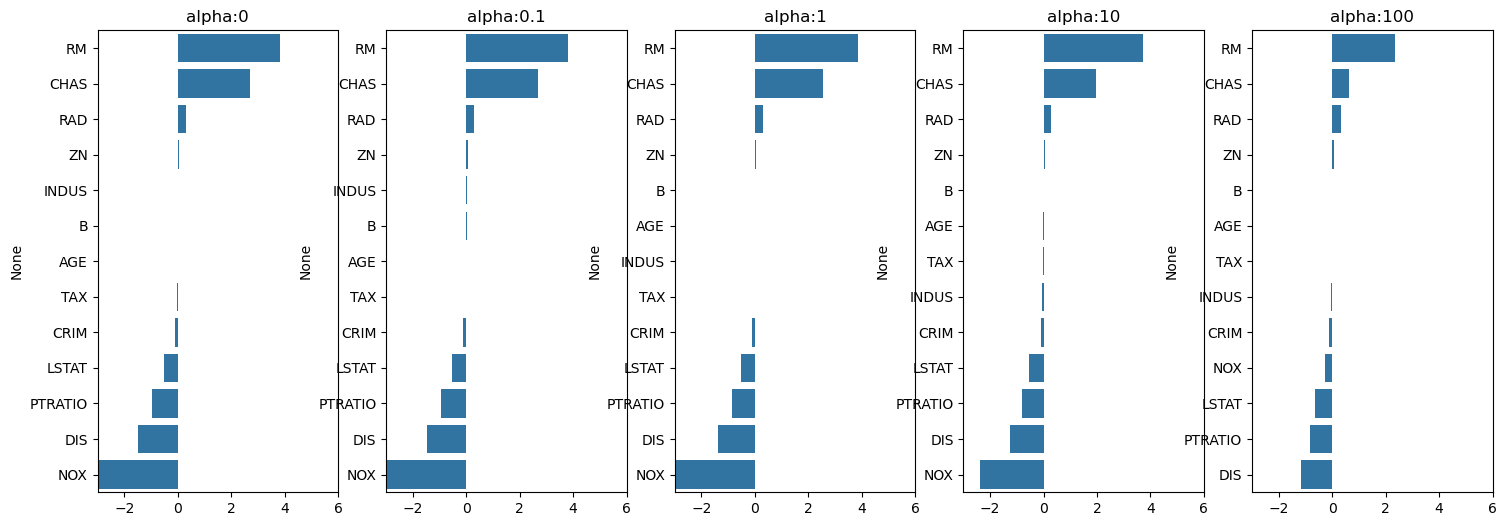

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')  #사이킷런 1.2 부터는 보스턴 주택가격 데이터가 없어진다는 warning 메시지 출력 제거


# boston 데이타셋 DataFrame 변환
bostonDF = pd.read_csv('./boston_house_prices.csv', header=1)


print('Boston 데이타셋 크기 :',bostonDF.shape)

# 컬럼명 변경
bostonDF.rename(
    columns={'MEDV':'PRICE'}
    , inplace=True
)

# 데이터프레임 안에 데이터와 레이블 분리
y_target=bostonDF['PRICE'] # 레이블 저장
X_data=bostonDF.drop(['PRICE'], axis=1, inplace=False)

# Ridge
print('='*50,'Ridge','='*50)
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

ridge=Ridge(alpha=10)
neg_mse_scores=cross_val_score(
      ridge                                     # 알고리즘
    , X_data                                    # 데이터
    , y_target                                  # 레이블
    , scoring='neg_mean_squared_error'          # 평가지표 지정
    , cv=5                                      # cv=fold cnt
)

print(f'neg_mse_scores : {neg_mse_scores}')

rmse_scores=np.sqrt(-1*neg_mse_scores)
print(f'rmse_scores : {rmse_scores}')

avg_rmse=np.mean(rmse_scores)
print(f'avg_rmse : {avg_rmse}')

# 릿지에 사용될 alpha 파라미터의 값을 정의
alphas = [0, 0.1, 1, 10, 100]


# alphas list 값을 반복하면서 alpha에 따른 평균 rmse를 구함.
for alpha in alphas :
    ridge = Ridge(alpha = alpha)
   
    # cross_val_score를 이용해 5 폴드의 평균 RMSE를 계산
    neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    print('alpha {0} 일 때 5 folds 의 평균 RMSE : {1:.3f} '.format(alpha, avg_rmse))

# 각 alpha에 따른 회귀 계수 값을 시각화하기 위해 5개의 열로 된 맷플롯립 축 생성  
fig , axs = plt.subplots(figsize=(18,6) , nrows=1 , ncols=5)
# 각 alpha에 따른 회귀 계수 값을 데이터로 저장하기 위한 DataFrame 생성  
coeff_df = pd.DataFrame()


# alphas 리스트 값을 차례로 입력해 회귀 계수 값 시각화 및 데이터 저장. pos는 axis의 위치 지정
for pos , alpha in enumerate(alphas) :
    ridge = Ridge(alpha = alpha)
    ridge.fit(X_data , y_target)
    # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가.  
    coeff = pd.Series(data=ridge.coef_ , index=X_data.columns )
    colname='alpha:'+str(alpha)
    coeff_df[colname] = coeff
    # 막대 그래프로 각 alpha 값에서의 회귀 계수를 시각화. 회귀 계수값이 높은 순으로 표현
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3,6)
    sns.barplot(x=coeff.values , y=coeff.index, ax=axs[pos])
    

# for 문 바깥에서 맷플롯립의 show 호출 및 alpha에 따른 피처별 회귀 계수를 DataFrame으로 표시
plt.show()

# Rasso reg

In [64]:
from sklearn.linear_model import Lasso, ElasticNet


# alpha값에 따른 회귀 모델의 폴드 평균 RMSE를 출력하고 회귀 계수값들을 DataFrame으로 반환
def get_linear_reg_eval(model_name, params=None, X_data_n=None, y_target_n=None,
                        verbose=True, return_coeff=True):
    coeff_df = pd.DataFrame()
    if verbose : print('####### ', model_name , '#######')
    for param in params:
        if model_name =='Ridge': model = Ridge(alpha=param)
        elif model_name =='Lasso': model = Lasso(alpha=param)
        elif model_name =='ElasticNet': model = ElasticNet(alpha=param, l1_ratio=0.7)
        neg_mse_scores = cross_val_score(model, X_data_n,
                                             y_target_n, scoring="neg_mean_squared_error", cv = 5)
        avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
        print('alpha {0}일 때 5 폴드 세트의 평균 RMSE: {1:.3f} '.format(param, avg_rmse))
        # cross_val_score는 evaluation metric만 반환하므로 모델을 다시 학습하여 회귀 계수 추출
       
        model.fit(X_data_n , y_target_n)
        if return_coeff:
            # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가.
            coeff = pd.Series(data=model.coef_ , index=X_data_n.columns )
            colname='alpha:'+str(param)
            coeff_df[colname] = coeff
   
    return coeff_df
# end of get_linear_regre_eval



In [65]:
# 라쏘에 사용될 alpha 파라미터의 값들을 정의하고 get_linear_reg_eval() 함수 호출
lasso_alphas = [ 0.07, 0.1, 0.5, 1, 3]
coeff_lasso_df =get_linear_reg_eval('Lasso', params=lasso_alphas, X_data_n=X_data, y_target_n=y_target)

#######  Lasso #######
alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 5.612 
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.615 
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 5.669 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.776 
alpha 3일 때 5 폴드 세트의 평균 RMSE: 6.189 


In [66]:
# 반환된 coeff_lasso_df를 첫번째 컬럼순으로 내림차순 정렬하여 회귀계수 DataFrame출력
sort_column = 'alpha:'+str(lasso_alphas[0])
coeff_lasso_df.sort_values(by=sort_column, ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.789725,3.703202,2.498212,0.949811,0.000000
CHAS,1.434343,0.955190,0.000000,0.000000,0.000000
RAD,0.270936,0.274707,0.277451,0.264206,0.061864
ZN,0.049059,0.049211,0.049544,0.049165,0.037231
B,0.010248,0.010249,0.009469,0.008247,0.006510
NOX,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
AGE,-0.011706,-0.010037,0.003604,0.020910,0.042495
TAX,-0.014290,-0.014570,-0.015442,-0.015212,-0.008602
INDUS,-0.042120,-0.036619,-0.005253,-0.000000,-0.000000
CRIM,-0.098193,-0.097894,-0.083289,-0.063437,-0.000000


In [67]:
# 엘라스틱넷에 사용될 alpha 파라미터의 값들을 정의하고 get_linear_reg_eval() 함수 호출
# l1_ratio는 0.7로 고정
elastic_alphas = [ 0.07, 0.1, 0.5, 1, 3]
coeff_elastic_df =get_linear_reg_eval('ElasticNet', params=elastic_alphas,
                                      X_data_n=X_data, y_target_n=y_target)

#######  ElasticNet #######
alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 5.542 
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.526 
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 5.467 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.597 
alpha 3일 때 5 폴드 세트의 평균 RMSE: 6.068 


In [68]:
# 반환된 coeff_elastic_df를 첫번째 컬럼순으로 내림차순 정렬하여 회귀계수 DataFrame출력
sort_column = 'alpha:'+str(elastic_alphas[0])
coeff_elastic_df.sort_values(by=sort_column, ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.574162,3.414154,1.918419,0.938789,0.000000
CHAS,1.330724,0.979706,0.000000,0.000000,0.000000
RAD,0.278880,0.283443,0.300761,0.289299,0.146846
ZN,0.050107,0.050617,0.052878,0.052136,0.038268
B,0.010122,0.010067,0.009114,0.008320,0.007020
AGE,-0.010116,-0.008276,0.007760,0.020348,0.043446
TAX,-0.014522,-0.014814,-0.016046,-0.016218,-0.011417
INDUS,-0.044855,-0.042719,-0.023252,-0.000000,-0.000000
CRIM,-0.099468,-0.099213,-0.089070,-0.073577,-0.019058
NOX,-0.175072,-0.000000,-0.000000,-0.000000,-0.000000


## 전처리

In [71]:
# 전처리
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures

# method는 표준 정규 분포 변환(Standard), 최대값/최소값 정규화(MinMax), 로그변환(Log) 결정
# p_degree는 다향식 특성을 추가할 때 적용. p_degree는 2이상 부여하지 않음.
def get_scaled_data(method='None', p_degree=None, input_data=None):
    if method == 'Standard':
        scaled_data = StandardScaler().fit_transform(input_data)
    elif method == 'MinMax':
        scaled_data = MinMaxScaler().fit_transform(input_data)
    elif method == 'Log':
        scaled_data = np.log1p(input_data)
    else:
        scaled_data = input_data


    if p_degree != None:
        scaled_data = PolynomialFeatures(degree=p_degree,
                                         include_bias=False).fit_transform(scaled_data)
   
    return scaled_data


In [72]:
# Ridge의 alpha값을 다르게 적용하고 다양한 데이터 변환방법에 따른 RMSE 추출.
alphas = [0.1, 1, 10, 100]
#변환 방법은 모두 6개, 원본 그대로, 표준정규분포, 표준정규분포+다항식 특성
# 최대/최소 정규화, 최대/최소 정규화+다항식 특성, 로그변환
scale_methods=[(None, None), ('Standard', None), ('Standard', 2),
               ('MinMax', None), ('MinMax', 2), ('Log', None)]
for scale_method in scale_methods:
    X_data_scaled = get_scaled_data(method=scale_method[0], p_degree=scale_method[1],
                                    input_data=X_data)
    print(X_data_scaled.shape, X_data.shape)
    print('\n## 변환 유형:{0}, Polynomial Degree:{1}'.format(scale_method[0], scale_method[1]))
    get_linear_reg_eval('Ridge', params=alphas, X_data_n=X_data_scaled,
                        y_target_n=y_target, verbose=False, return_coeff=False)



(506, 13) (506, 13)

## 변환 유형:None, Polynomial Degree:None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.788 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.653 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.518 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 5.330 
(506, 13) (506, 13)

## 변환 유형:Standard, Polynomial Degree:None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.826 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.803 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.637 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 5.421 
(506, 104) (506, 13)

## 변환 유형:Standard, Polynomial Degree:2
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 8.827 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 6.871 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.485 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 4.634 
(506, 13) (506, 13)

## 변환 유형:MinMax, Polynomial Degree:None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.764 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.465 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.754 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 7.635 
(506, 104) (506, 13)

## 변환 유형:MinMax, Polynomial Degree:2
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.298 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 4.323 
alpha 10일 때 5 폴드 세트의 평균 RMS